In [1]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import get_dataset_df_from_file as get_world_dataset_df_from_file

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch data set from local disk

In [4]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-04-01_1652_state_daily_data.csv 2020-04-03_1448_state_rank.csv
2020-04-01_1652_state_rank.csv       2020-04-03_1503_state_daily_data.csv
2020-04-01_1654_state_daily_data.csv 2020-04-03_1503_state_rank.csv
2020-04-01_1654_state_rank.csv       2020-04-03_1525_state_daily_data.csv
2020-04-01_1658_state_daily_data.csv 2020-04-03_1525_state_rank.csv
2020-04-01_1658_state_rank.csv       2020-04-04_0009_state_daily_data.csv
2020-04-03_0323_state_daily_data.csv 2020-04-04_0009_state_rank.csv
2020-04-03_0323_state_rank.csv       2020-04-04_1605_state_daily_data.csv
2020-04-03_0345_state_daily_data.csv 2020-04-04_1605_state_rank.csv
2020-04-03_0345_state_rank.csv       2020-04-04_1612_state_daily_data.csv
2020-04-03_1448_state_daily_data.csv 2020-04-04_1612_state_rank.csv
Latest files are:
	/Users/drskippy/data/2020-04-04_1612_state_daily_data.csv
	/Users/drskippy/data/2020-04-04_1612_state_rank.csv


In [5]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,order,lastUpdateEt
0,2020-03-04,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,...,54,54,36,NaN,NaN,NaN,NaN,NaN,0,2020-04-03 11:00:00
1,2020-03-05,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,...,98,98,36,0.0,0.0,28.0,16.0,44.0,0,2020-04-03 11:00:00
2,2020-03-06,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,125,125,36,0.0,0.0,16.0,11.0,27.0,0,2020-04-03 11:00:00
3,2020-03-07,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,168,168,36,0.0,0.0,0.0,43.0,43.0,0,2020-04-03 11:00:00
4,2020-03-08,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,197,197,36,0.0,0.0,0.0,29.0,29.0,0,2020-04-03 11:00:00


### SIR Model

In [6]:
dfq, _ = get_state_df(df, "*")
pos_untested = 0.8
dfq["actual_pos"] = dfq.positive.values*(1 + pos_untested)/1000
dfq.head()

,date,positive,negative,pending,totalTestResults,death,lastUpdateEt,daily_new_positive,actual_pos
0,2020-03-04,118.0,748.0,103.0,866,10.0,2020-04-03 23:00:00,NaN,0.2124
1,2020-03-05,176.0,953.0,197.0,1129,11.0,2020-04-03 23:00:00,58.0,0.3168
2,2020-03-06,223.0,1571.0,458.0,1794,14.0,2020-04-03 23:00:00,47.0,0.4014
3,2020-03-07,341.0,1809.0,602.0,2150,16.0,2020-04-03 23:00:00,118.0,0.6138
4,2020-03-08,417.0,2335.0,347.0,2752,18.0,2020-04-03 23:00:00,76.0,0.7506


### SIR Fit

/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


   direc: array([[-1.51637860e-03,  1.24068850e-03,  1.03176227e-01],
       [-3.07122343e-04,  2.58248269e-06,  5.09833492e-04],
       [-1.11503892e-03,  9.99073801e-04,  9.15624420e-02]])
     fun: 6369.947740969354
 message: 'Optimization terminated successfully.'
    nfev: 391
     nit: 10
  status: 0
 success: True
       x: array([0.32214488, 0.15890974, 1.91028655])
Doubling time is about 2.15 days
Recovery time is about 4.36 days
Estimated initial infection was order of 1,910 poeple


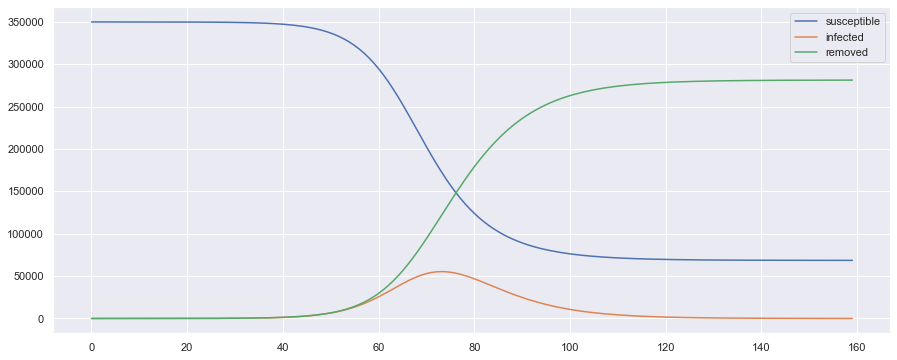

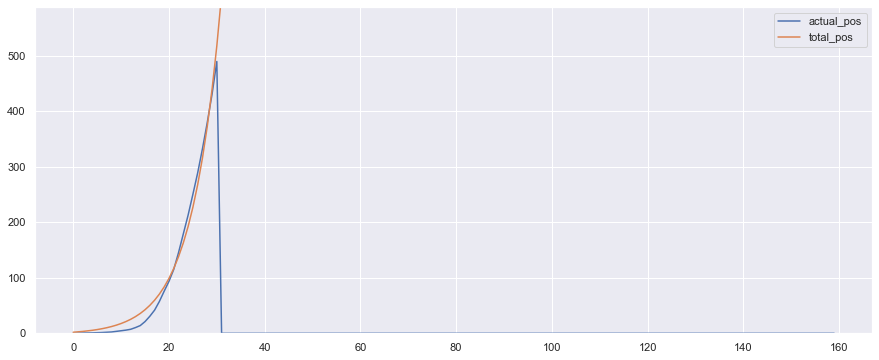

In [7]:
N=350000 
x0 = (0.33989521, 0.14846294, 1.09806025)
c = dfq.actual_pos.values
sf = SIR()
beta, gamma, I0 = sf.SIRFitter(c, N, x0)
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))

### SIR4: Try Varying beta as part of the model

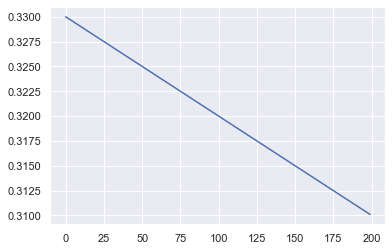

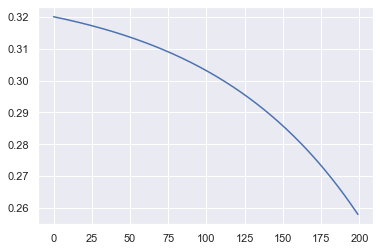

In [8]:
def g(alpha, beta0, t):
    return beta0 - alpha * t

def h(alpha, beta0, t):
    return beta0 - np.log(alpha) * alpha ** t

t = np.arange(0, 200, 1)
plt.plot(t, g(.0001, .33, t))
plt.show()
plt.plot(t, h(1.01, .33, t))
plt.show()

/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/drskippy/Working/2020covid19/covid_analysis/models.py:187: RuntimeWarning: invalid value encountered in log
  dbetadt = - np.log(alpha) * alpha ** t
/Users/drskippy/Working/2020covid19/covid_analysis/models.py:187: RuntimeWarning: invalid value encountered in double_scalars
  dbetadt = - np.log(alpha) * alpha ** t


   direc: array([[0.00219128, 0.02604387, 0.02246523, 0.20278593],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.00212133, 0.02870748, 0.02252302, 0.20133775]])
     fun: 6021.485670089249
 message: 'Optimization terminated successfully.'
    nfev: 1149
     nit: 18
  status: 0
 success: True
       x: array([1.00113611, 0.54542175, 0.26983231, 1.85777673])
Doubling time (0) is about 1.27 days
Alpha = 1.00
Recovery time is about 2.57 days
Estimated initial infection was order of 1,857 poeple


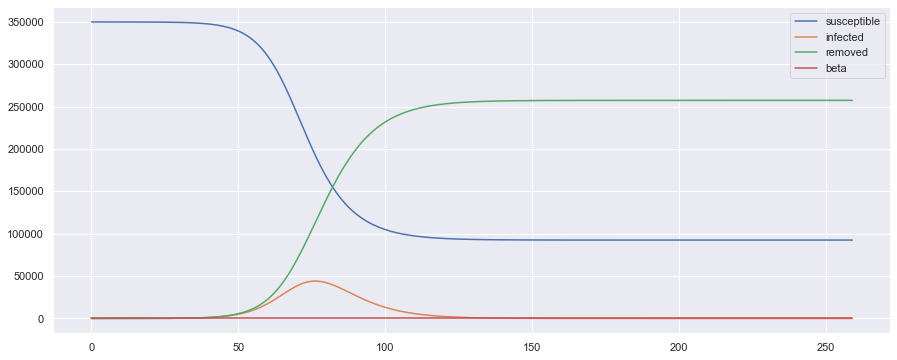

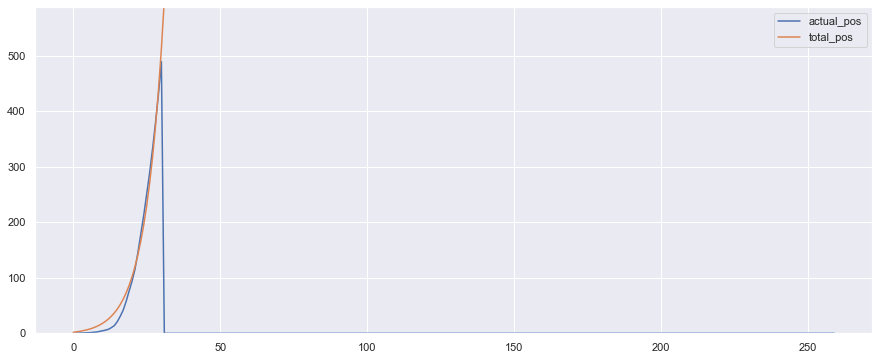

In [9]:
N=350000 
x0 = (0.0001, 0.33, 0.08, 0.1)  # alpha, beta0, gamma, I0
c = dfq.actual_pos.values
sf = SIR4()
alpha, beta0, gamma, I0 = sf.SIRFitter(c, N, x0)
print("Doubling time (0) is about {:.2f} days".format(np.log(2)/beta0))
print("Alpha = {:.2f}".format(alpha))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))

In [10]:
dfw, wsl = get_world_dataset_df_from_file()
dfw.head()

,Entity,state,Date,positive,date,lastUpdateEt,negative,pending
0,Afghanistan,AFG,"Dec 31, 2019",0,2019-12-31,2020-04-04 18:07:03.557575,0,0
1,Afghanistan,AFG,"Jan 1, 2020",0,2020-01-01,2020-04-04 18:07:03.557575,0,0
2,Afghanistan,AFG,"Jan 2, 2020",0,2020-01-02,2020-04-04 18:07:03.557575,0,0
3,Afghanistan,AFG,"Jan 3, 2020",0,2020-01-03,2020-04-04 18:07:03.557575,0,0
4,Afghanistan,AFG,"Jan 4, 2020",0,2020-01-04,2020-04-04 18:07:03.557575,0,0


In [11]:
dfq, _ = get_state_df(dfw, "ITA")
pos_untested = 0.8
dfq["actual_pos"] = dfq.positive.values*(1 + pos_untested)/1000
N=68000 
R0=0
x0 = (0.33989521, 0.14846294, 1.09806025)
c = np.trim_zeros(dfq.actual_pos.values)
beta, gamma, I0 = sf.SIRFitter(c, N, x0)
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
dfq, _ = get_state_df(dfw, "ESP")
pos_untested = 0.8
dfq["actual_pos"] = dfq.positive.values*(1 + pos_untested)/1000
N=46660 
R0=0
x0 = (0.3896, 0.08149, 0.1)
c = np.trim_zeros(dfq.actual_pos.values)
beta, gamma, I0 = sf.SIRFitter(c, N, x0)
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))